In [1]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import sklearn
from scipy.optimize import curve_fit

#### Load Excel Sheet

In [2]:
df= pd.read_excel('3D_Battery_Performance_Log.xls', sheet_name='3_CapacityRate')

In [3]:
df

,Paper # 1,set #1 E,Paper # 1.1,set #1 M,Paper #4,set #1 E.1,Paper #4.1,set #2 E,Paper #4.2,set #3 E,...,Paper #23,set #1 E.4,Paper #23.1,set #2 E.2,Paper #27,set #1 E.5,Paper #31,set #1 E.6,Paper #31.1,set #2 E.3
0,C rate,Capacity (mAh/g),C rate,Capacity (mAh/g),C rate,Capacity (mAh/g),C rate,Capacity (mAh/g),C rate,Capacity (mAh/g),...,C rate,Capacity (mAh/g),C rate,Capacity (mAh/g),C rate,Capacity (mAh/g),C rate,Capacity (mAh/g),C rate,Capacity (mAh/g)
1,0.026661,110.350768,0.287220,92.322541,0.048147,0.355790,0.059551,0.363598,0.096021,0.364299,...,8.712551,83.585488,4.850202,122.836782,2.004132,134.186747,30.141129,61.467890,30.100806,24.770642
2,0.147635,99.595634,0.566392,82.739099,0.121655,0.170715,0.162193,0.128205,NaN,NaN,...,7.425101,108.152845,3.587045,126.225383,4.979339,134.512048,9.979839,79.816514,9.939516,131.192661
3,0.279776,96.285964,0.836257,72.391035,NaN,NaN,NaN,NaN,NaN,NaN,...,6.137652,117.471497,2.299595,127.919683,9.938017,124.753012,4.979839,244.954128,4.939516,206.422018
4,0.566392,85.000231,1.406232,52.891525,NaN,NaN,NaN,NaN,NaN,NaN,...,4.850202,122.836782,1.012146,129.896367,20.061983,84.740964,0.423387,301.834862,0.463710,311.009174
5,0.838584,75.122293,2.810928,26.834216,NaN,NaN,NaN,NaN,NaN,NaN,...,3.587045,126.225383,7.400810,104.481860,NaN,NaN,NaN,NaN,NaN,NaN
6,1.405767,57.791812,0.143316,94.650861,NaN,NaN,NaN,NaN,NaN,NaN,...,2.299595,127.919683,8.688259,77.655437,NaN,NaN,NaN,NaN,NaN,NaN
7,2.810928,25.013564,0.035829,110.240547,NaN,NaN,NaN,NaN,NaN,NaN,...,1.012146,129.896367,6.113360,114.930046,NaN,NaN,NaN,NaN,NaN,NaN


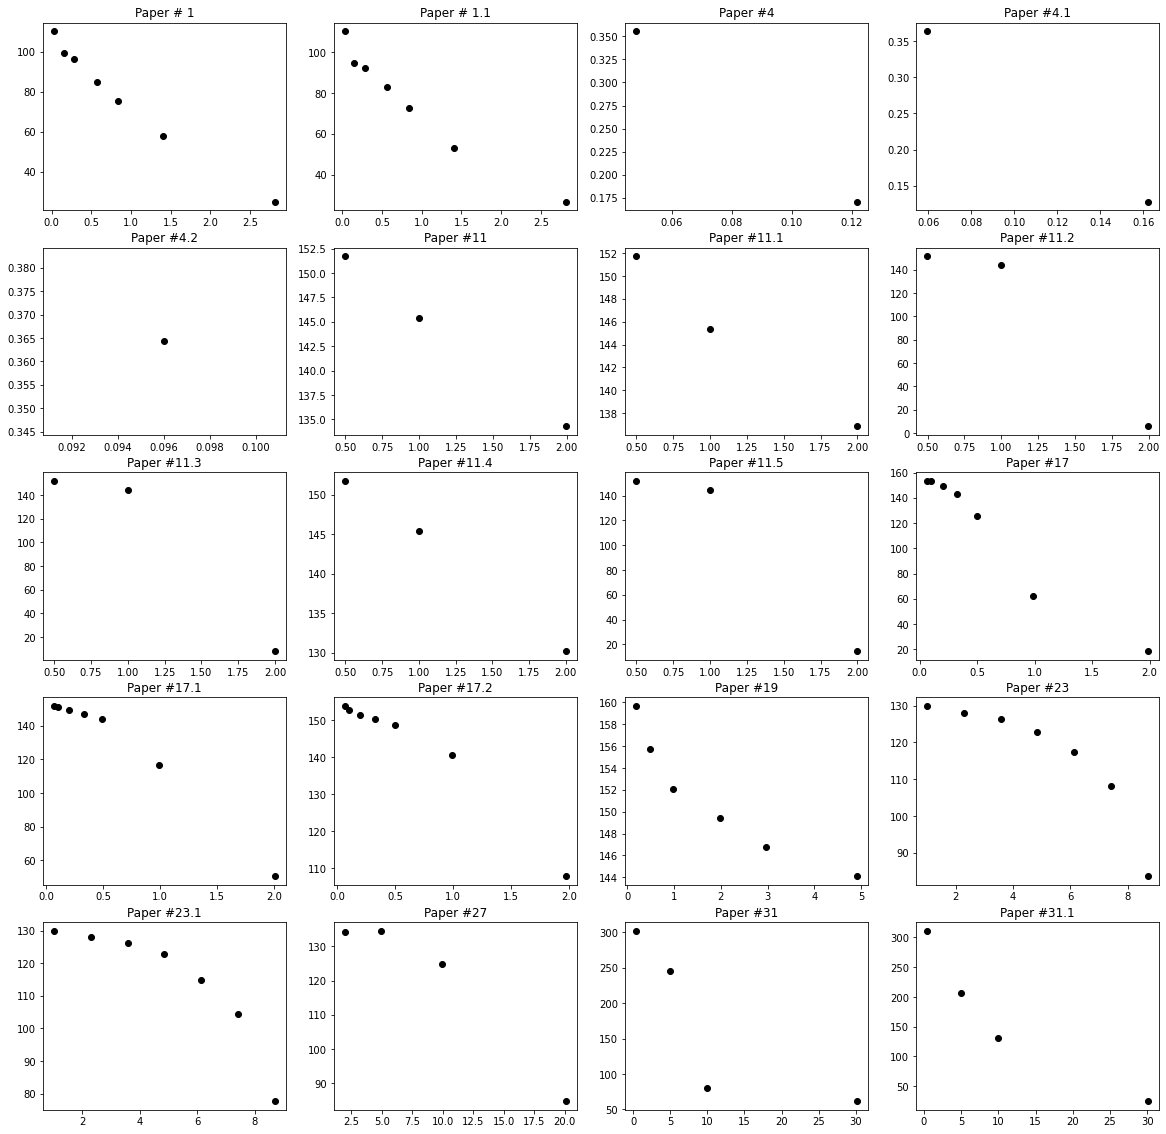

In [4]:
matplotlib.rcParams.update({'font.size': 10})
fig = plt.figure(figsize=(20,20))
#ax = fig.subplots(nrows=5,ncols=4)
#jet= plt.get_cmap('jet')
#colors = iter(jet(np.linspace(0,1,20)))

for i in range(int(len(df.columns)/2)):
    ax = plt.subplot(5, 4, i+1, title=df.columns[2*i])
    ax.plot(df.iloc[:,2*i].values[1:],df.iloc[:,2*i+1].values[1:],color='k',marker='o', linewidth=0)
    #ax.set_xlim([0,40])
    #ax.set_ylim([0,200])
    #ax.set_xscale('log')
    #ax.set_yscale('log')

#### Define the Euqation to be fitted

In [5]:
def objective(R,t,n,Q):
    return Q*(1-( (R*t) ** n ) * (1 - np.exp(- ((R*t) ** (-n)) )) )

In [6]:
def par_std(t, n, Q, covariance):
    # summarize the parameter and standard deviation
    std = np.sqrt(np.diag(covariance))
    print('t = ' + f'{t:.3f}' + u'\u00B1' + f'{std[0]:.3f}')
    print('n = ' + f'{n:.3f}' + u'\u00B1' + f'{std[1]:.3f}')
    print('Q = ' + f'{Q:.3f}' + u'\u00B1' + f'{std[2]:.3f}')
    return

In [7]:
def plot_fit(R,y,t,n,Q):
    # plot data as scattered points
    plt.scatter(R, y)
    # define a sequence of x-axis point based on the limits of the data
    R_line = np.arange(0.5*min(R), 1.5*max(R), 0.01)
    # calculate y with the fitted equation
    y_line = objective(R_line, t, n, Q)
    # plot equation
    plt.plot(R_line, y_line, '--', color='red')
    return

<ipython-input-5-26a65b54c072>:2: RuntimeWarning: invalid value encountered in power
  return Q*(1-( (R*t) ** n ) * (1 - np.exp(- ((R*t) ** (-n)) )) )
<ipython-input-5-26a65b54c072>:2: RuntimeWarning: invalid value encountered in power
  return Q*(1-( (R*t) ** n ) * (1 - np.exp(- ((R*t) ** (-n)) )) )
<ipython-input-5-26a65b54c072>:2: RuntimeWarning: invalid value encountered in power
  return Q*(1-( (R*t) ** n ) * (1 - np.exp(- ((R*t) ** (-n)) )) )
/home/daniu/miniconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-5-26a65b54c072>:2: RuntimeWarning: invalid value encountered in power
  return Q*(1-( (R*t) ** n ) * (1 - np.exp(- ((R*t) ** (-n)) )) )
/home/daniu/miniconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covari

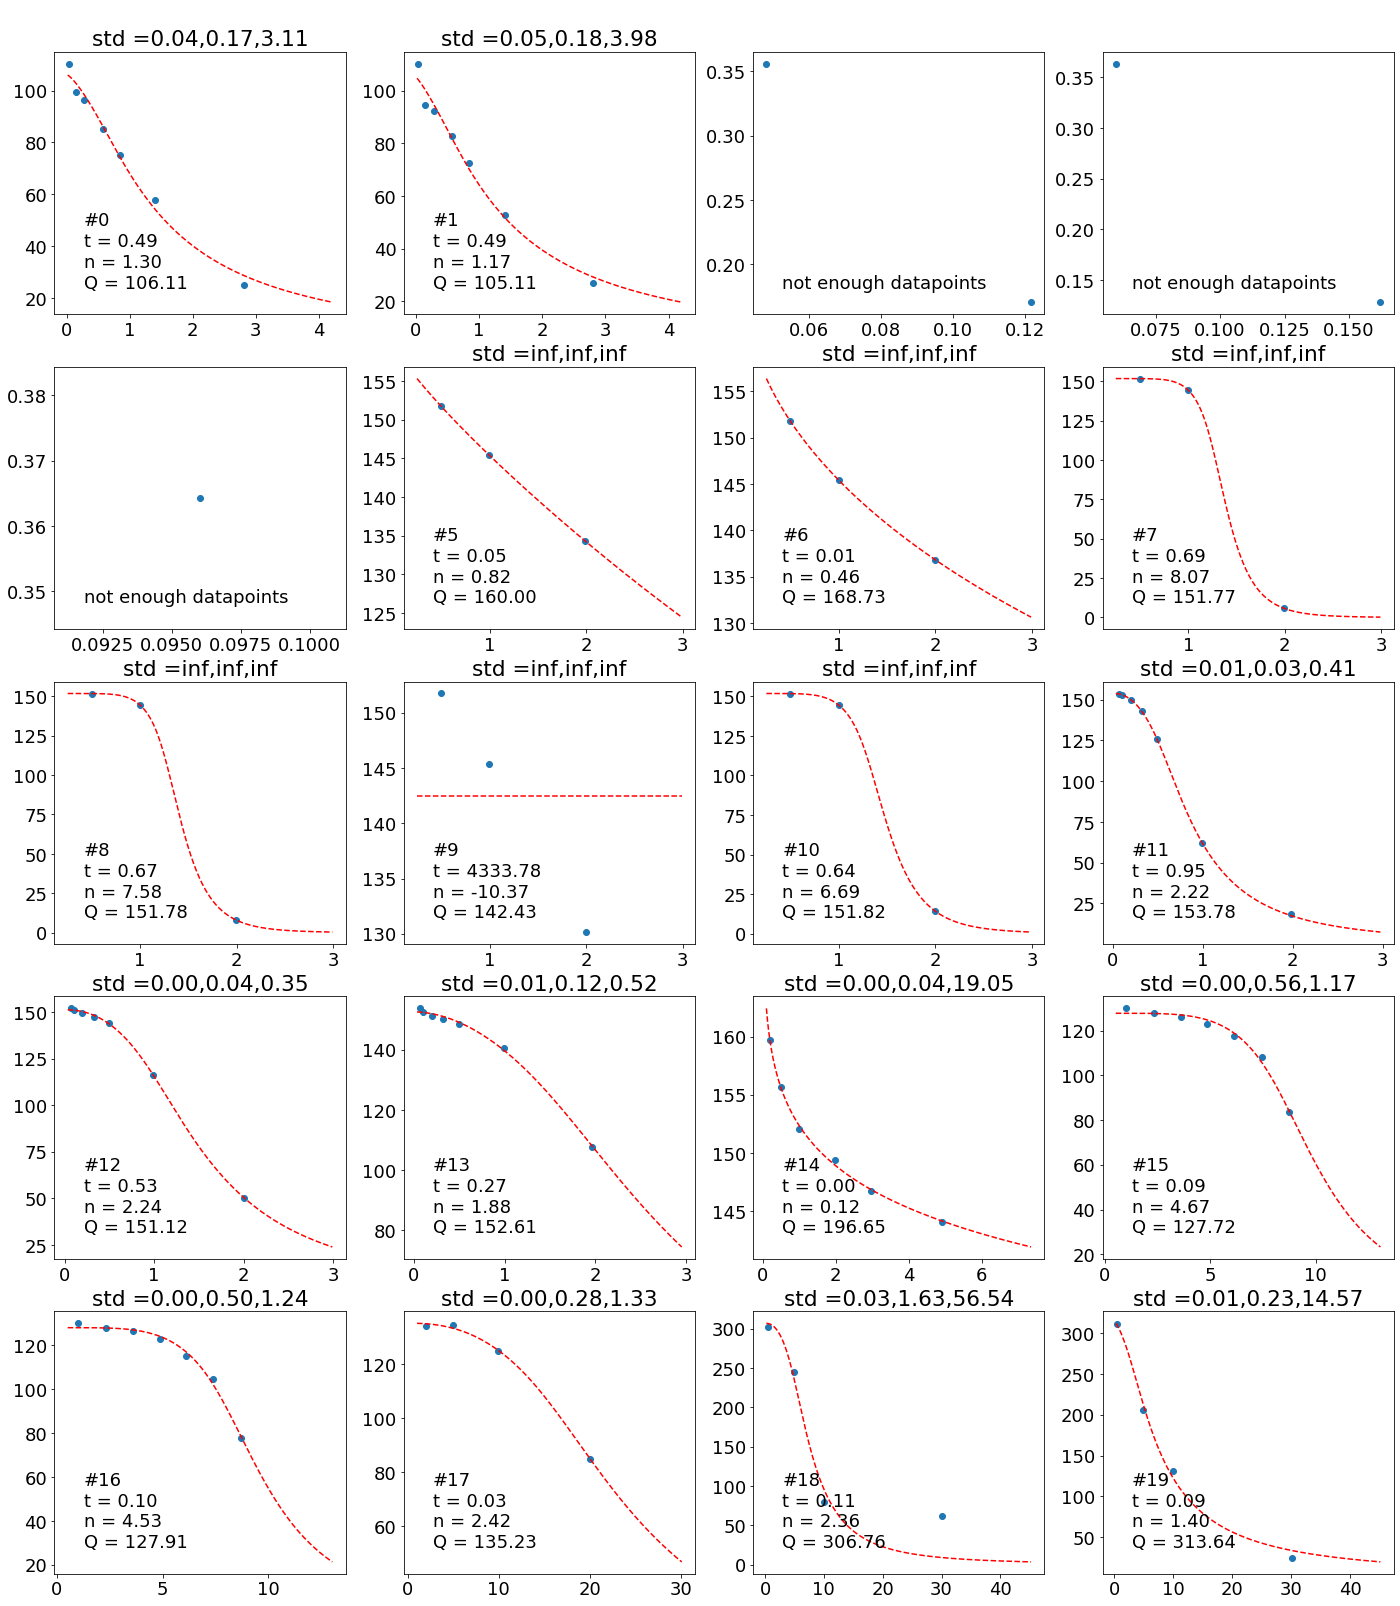

In [52]:
matplotlib.rcParams.update({'font.size': 18})
fig = plt.figure(figsize=(24,28))
#ax = fig.subplots(nrows=5,ncols=4)
list_of_t = []
list_of_n = []
list_of_Q = []

for i in range(int(len(df.columns)/2)):
    # choose the input and output variables
    R = df.iloc[:,2*i].values[1:]
    R = R[~pd.isnull(R)]
    y = df.iloc[:,2*i+1].values[1:]
    y = y[~pd.isnull(y)]
    if len(R)>=3:
        par, cov = curve_fit(objective, R, y, p0=[100,0.5,100])#, bounds=([-1, 0, 0],[np.inf, 10, 500]))
        t,n,Q = par
        #print("\n\n")
        #par_std(t, n, Q, cov)
        std = np.sqrt(np.diag(cov))
        labs = '#'+str(i)+'\nt = ' + f'{t:.2f}' +'\nn = ' + f'{n:.2f}' + '\nQ = ' + f'{Q:.2f}'
        ax = plt.subplot(5, 4, i+1, title= '\nstd =' + f'{std[0]:.2f}'+ ','+ f'{std[1]:.2f}'+ ',' + f'{std[2]:.2f}')
        plt.text(0.1, 0.1, labs, transform=ax.transAxes)
        #ax.legend(lab,fontsize=18)
        ax = plot_fit(R, y, t, n, Q)
    else:
        t = 0
        n = 0
        Q = 0
        ax = plt.subplot(5, 4, i+1)
        plt.text(0.1, 0.1, 'not enough datapoints', transform=ax.transAxes)
        ax = plt.scatter(R,y)
    
    list_of_t.append(t)
    list_of_n.append(n)
    list_of_Q.append(Q)


[inf inf inf]


<ipython-input-5-26a65b54c072>:2: RuntimeWarning: overflow encountered in power
  return Q*(1-( (R*t) ** n ) * (1 - np.exp(- ((R*t) ** (-n)) )) )
<ipython-input-5-26a65b54c072>:2: RuntimeWarning: invalid value encountered in power
  return Q*(1-( (R*t) ** n ) * (1 - np.exp(- ((R*t) ** (-n)) )) )
/home/daniu/miniconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


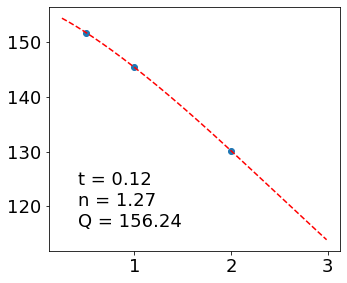

In [53]:
matplotlib.rcParams.update({'font.size': 18})
fig = plt.figure(figsize=(24,26))

R = df.iloc[:,18].values[1:]
R = R[~pd.isnull(R)]
y = df.iloc[:,19].values[1:]
y = y[~pd.isnull(y)]

par, cov = curve_fit(objective, R, y, p0=[100,1,100])
t,n,Q = par
std = np.sqrt(np.diag(cov))
labs = 't = ' + f'{t:.2f}' +'\nn = ' + f'{n:.2f}'+'\nQ = ' + f'{Q:.2f}'
ax = plt.subplot(5, 4, i+1)
plt.text(0.1, 0.1, labs, transform=ax.transAxes)
ax = plot_fit(R, y, t, n, Q)
print(std)

list_of_t[9] = t
list_of_n[9] = n
list_of_Q[9] = Q


Text(0, 0.5, 'number of cases')

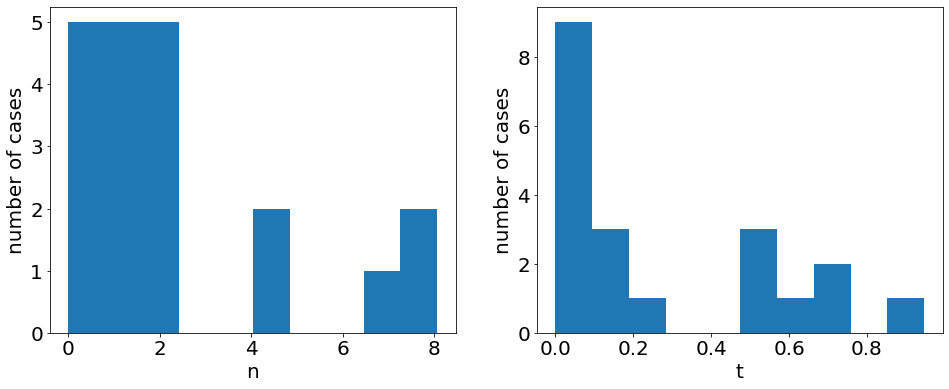

In [31]:
matplotlib.rcParams.update({'font.size': 20})
fig = plt.figure(figsize=(16,6))
ax = fig.subplots(nrows=1,ncols=2)

ax[0].hist(list_of_n)
ax[0].set_xlabel('n')
ax[0].set_ylabel('number of cases')
ax[1].hist(list_of_t)
ax[1].set_xlabel('t')
ax[1].set_ylabel('number of cases')

In [11]:
geo_df= pd.read_excel('3D_Battery_Parameter_Log.xls', sheet_name='GeometryParameters')

In [12]:
geo_df

,Paper #,DOI,Set,Full Cell \nThickness [µm],Cathode \nThickness [µm],Anode \nThickness [µm],Separator \nThickness [µm],Cathode 3D \nCharateristic Length [µm],Cathode 3D \nCharateristic Note,Anode 3D \nCharateristic\nLength [µm],Anode 3D \nCharateristic Note
0,1,https://doi.org/10.1021/acsaem.0c01029,1,NaN,500,N/R,N/R,100,Circular Column Diameter,NaN,NaN
1,2,https://doi.org/10.1016/j.addma.2018.07.006,1,NaN,N/R,215,N/R,N/R,N/R,NaN,Microlattice
2,2,https://doi.org/10.1016/j.addma.2018.07.006,2,NaN,N/R,415,N/R,N/R,N/R,NaN,Microlattice
3,2,https://doi.org/10.1016/j.addma.2018.07.006,3,NaN,N/R,265,N/R,N/R,N/R,NaN,Microlattice
4,2,https://doi.org/10.1016/j.addma.2018.07.006,4,NaN,N/R,473,N/R,N/R,N/R,NaN,Microlattice
...,...,...,...,...,...,...,...,...,...,...,...
86,36,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87,37,https://doi.org/10.1073/pnas.1423889112,1,10,10,10,N/R,14,width of each individual electrode digit; rect...,14,width of each individual electrode digit; rect...
88,37,https://doi.org/10.1073/pnas.1423889112,2,10,10,10,N/R,24.5,width of each individual electrode digit; rect...,24.5,width of each individual electrode digit; rect...
89,37,https://doi.org/10.1073/pnas.1423889112,3,10,10,10,N/R,21,width of each individual electrode digit; rect...,21,width of each individual electrode digit; rect...


In [13]:
thickness_df = geo_df[['Paper #','Set','Cathode \nThickness [µm]','Anode \nThickness [µm] ']]
thickness_df

,Paper #,Set,Cathode \nThickness [µm],Anode \nThickness [µm]
0,1,1,500,N/R
1,2,1,N/R,215
2,2,2,N/R,415
3,2,3,N/R,265
4,2,4,N/R,473
...,...,...,...,...
86,36,1,NaN,NaN
87,37,1,10,10
88,37,2,10,10
89,37,3,10,10


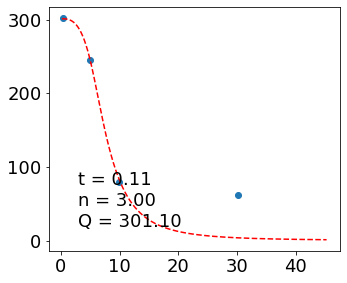

In [14]:
matplotlib.rcParams.update({'font.size': 18})
fig = plt.figure(figsize=(24,26))

R = df.iloc[:,36].values[1:]
R = R[~pd.isnull(R)]
y = df.iloc[:,37].values[1:]
y = y[~pd.isnull(y)]

par, cov = curve_fit(objective, R, y, p0=[0.1,3,300], bounds=([0, 3, 200],[0.8, 8, 330]))
t,n,Q = par
labs = 't = ' + f'{t:.2f}' +'\nn = ' + f'{n:.2f}'+'\nQ = ' + f'{Q:.2f}'
ax = plt.subplot(5, 4, i+1)
plt.text(0.1, 0.1, labs, transform=ax.transAxes)
ax = plot_fit(R, y, t, n, Q)

#### 